In [1]:
import selenium
from selenium import webdriver
import requests
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
import html5lib

service = Service(executable_path=ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

In [2]:
url = "https://scripterswar.com/EldenRing/completion"
driver.get(url)

In [3]:
dropdowns = driver.find_elements(By.XPATH, "//*[contains(text(), '0')]")

In [4]:
for dropdown in dropdowns[3:]:
    try:
        dropdown.click()
    except:
        pass

In [5]:
expand_alls = driver.find_elements(By.XPATH, "//*[contains(text(), 'Expand All')]")

In [6]:
for expand in expand_alls:
    try:
        expand.click()
    except:
        pass

<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,shrink-to-fit=no" id="viewport" name="viewport"/>
  <meta content="Elden Ring 100% Checklist Tracker" name="description"/>
  <meta content="Samuel Magnan-Levesque" name="author"/>
  <meta content="notranslate" name="google"/>
  <meta content="#49423E" name="theme-color"/>
  <link href="" rel="icon"/>
  <link as="font" crossorigin="anonymous" href="/webpackAssets/MiniSet2@48e63747441d9a3bf0d8.woff2" rel="preload" type="font/woff2"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://scripterswar.com","name": "Scripters War Free Browser Game"}
  </script>
  <title>
   Elden Ring 100% Checklist Tracker
  </title>
  <script defer="defer" src="/webpackAssets/../compiled/souls/soulsCompletion/soulsCompletion.js?9c2f76657634e71d625b">
  </script>
  <link href="/webpackAssets/../compiled/souls/soulsCompletion/soulsCompletion.css?9
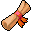

In [7]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

In [12]:
tables = soup.find_all('table')

dfs = []
for table in tables:
    dfs.append(pd.read_html(str(table)))

In [16]:
print(pd.read_html(str(table))[0])

     Obtained                                Name                Source
0         NaN        Abandoned Cave Site of Grace        Abandoned Cave
1         NaN      Abandoned Coffin Site of Grace         Altus Plateau
2         NaN       Abductor Virgin Site of Grace         Volcano Manor
3         NaN                       Abyssal Woods                   NaN
4         NaN  Academy Crystal Cave Site of Grace  Academy Crystal Cave
..        ...                                 ...                   ...
322       NaN      Windmill Village Site of Grace      Windmill Village
323       NaN    Worshippers' Woods Site of Grace          Siofra River
324       NaN     Wyndham Catacombs Site of Grace     Wyndham Catacombs
325       NaN   Yelough Anix Tunnel Site of Grace   Yelough Anix Tunnel
326       NaN           Zamor Ruins Site of Grace           Zamor Ruins

[327 rows x 3 columns]


In [20]:
df = pd.concat([pd.concat(pd.read_html(str(table)), axis=0) for table in tables], axis=0)
df.head

<bound method NDFrame.head of      Obtained                               Name  \
0         NaN                             Dagger   
1         NaN                    Parrying Dagger   
2         NaN                        Miséricorde   
3         NaN                        Great Knife   
4         NaN                Bloodstained Dagger   
..        ...                                ...   
322       NaN     Windmill Village Site of Grace   
323       NaN   Worshippers' Woods Site of Grace   
324       NaN    Wyndham Catacombs Site of Grace   
325       NaN  Yelough Anix Tunnel Site of Grace   
326       NaN          Zamor Ruins Site of Grace   

                                                Source  
0    Buy from merchant: Twin Maiden Husks Enemy dro...  
1            Buy from merchant: Patches Quest: Patches  
2                          On ground: Stormveil Castle  
3    Enemy drop: Demi-Human in Lakeside Crystal Cav...  
4    Enemy drop: Demi-Human Chief in Hermit Village...  
.. 

In [15]:
##convert df to csv
df.to_csv('elden_ring_checklist.csv')